# CERI 7211/8211 Global Geophysics Homework 1
## Some questions about gravity
### Due January 30, 2017

# Q1. 
Derive formular 2.31 from 2.29 in Lowry.


<div class="alert alert-success">

\begin{align*}
 a_{T} &= G m \left[ \frac{1}{(r_{L}-R)^{2}} - \frac{1}{r_{L}^{2}} \right] \\
 &= \frac{G m}{r_{L}^{2}} \left[ \frac{1}{\left( 1-\frac{R}{r_{L}} \right)^{2}} -1 \right],
\end{align*}

where $R$ is the Earth's radius and $r_{L}$ is the distance between the Earth and moon centers.

Since $x = \frac{R}{r_{L}} \ll 1$, the first term in the square bracket of the above expression can be expanded as

\begin{equation}
  f(x) = (1-x)^{-2} = 1 + 2x + 3x^{2} + \ldots.
\end{equation}

Therefore,

\begin{align*}
 a_{T} &= \frac{G m}{r_{L}^{2}} \left[ 1 + \frac{2R}{r_{L}} + \frac{3R^{2}}{r_{L}^{2}} + \cdots - 1 \right] \\
       &= \frac{G m}{r_{L}^{2}} \left[ \frac{2R}{r_{L}} + \frac{3R^{2}}{r_{L}^{2}} + \cdots \right].
\end{align*}

</div>

# Q2. 
Estimate the distance from the Earth that the moon formed 4 bilion years ago. Show all of your assumptions.


<div class="alert alert-success">

Presently, the moon is moving away from the Earth at 3.7 cm/yr (Lowry, p. 57). Assuming this rate has been constant,

\begin{equation}
  \Delta r_{L} = 3.7 \text{ cm/yr } \cdot 4 \times 10^{9} \text{ yr } \cdot 10^{-5} \text{ km/cm } = 1.48 \times 10^{5} \text{ km }.
\end{equation}

Now $r_{L}$ (see Q1) is 3.82$\times$10$^{5}$ km. So, 4 billion years ago, the moon would be at 2.34$\times$10$^{5}$ km.

</div>

# Q3. 
Estimate Earth's length of day 1 billion years ago. Show all of your assumptions. What are the implications of your derived length of day on the figure of the Earth and tidal friction.


<div class="alert alert-success">

The Earth is losing 2.4 msec per 100 years according to Fig. 2.15 in Lowry.

\begin{equation}
  \Delta T = 2.4 \times 10^{-5} \text{ s/yr } \cdot 10^{9} \text{ yr } = 2.4 \times 10^{4} \text{ s } = 6.7 \text{ hours}.
\end{equation}

The length of day would be about 17 hours. Since the length of day is shorter and the Moon closer, there should have been significantly more tidal friction at that time. It is likely that the length of day was even shorter.

</div>

# Q4.
How much more energy is expended by a ship moving up the side of a geoid high compared to it moving into a geoid low of the same amgnitude.


<div class="alert alert-success">

Trivial question. 0.

</div>

# Q5. 
A regional field study was performed and a Bouguer gravity anomaly observed over a presumed ore body (see Figure below). Estimate the position and density difference of the causative ore body by correcting for the regional trend and modeling the reduced gravity with a buried sphere.

<IPython.core.display.Javascript object>


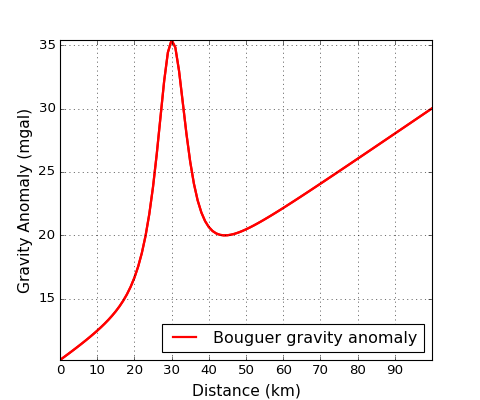

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

# Load the data
hw_data = np.loadtxt("hw_data.txt")
xmin = hw_data[:,0].min()
xmax = hw_data[:,0].max()
ymin = hw_data[:,1].min()
ymax = hw_data[:,1].max()

# Get plot handles.
fig = plt.figure(figsize=(6, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# Main plot
plt.plot(hw_data[:,0],hw_data[:,1], linewidth=2, color='red',label='Bouguer gravity anomaly')

# Legends
plt.legend(loc=4)

# Axis labels
plt.xlabel("Distance (km)", fontsize=14)
plt.ylabel("Gravity Anomaly (mgal)", fontsize=14)

# Grid lines
ax.set_xticks(np.arange(0.0, 100.0, 10.0))
ax.set_yticks(np.arange(5.0, 40.0,5.0))
plt.grid(True)

# Save figure (optional)
# plt.savefig("bouguer_anomaly_over_ore.pdf")

#<div class="alert alert-success">

- sphere radius: 5 km
- density anomaly: 0.2 g cm$^{-3}$
- sphere depth: 6 km
- x position: 30 km.

</div>

In [7]:
import numpy as np
%matplotlib notebook
def sphere_anom2(drho, a, x0, z0, x):
    ''' calculate the gravity anomaly due to a sphere located at (x0, y0, z0)
        with a radius, 'a', and a density anomaly of 'drho'.
        x is an array of x locations where the anomalies are computed.
    '''
    gam=6.672 # gravity constant m^3 kg^-1 s^-2 x 10^-11 to get mgal units.
    con1 = 4.0*np.pi*gam*drho*a**3/(3.0*z0*z0)
    dfact = (1.0/(1.0+((x-x0)/z0)**2))**1.5
    
    return con1*dfact

a    = 5.0  # radius, km
drho = 0.2  # g/cm^3
z0   = 6.0  # depth, km.
x0   = 30.0 # x position, km.

x = np.linspace(0.0,100.0,101)

g_sph = sphere_anom2(drho,a,x0,z0,x)
g_reg = np.linspace(10.0, 30.0, 101)
g = g_reg + g_sph